In [1]:
#comment
#observations

In [2]:
#import libraries for importing data and plotting
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
df = pd.read_csv('student.csv')

In [4]:
#visualize the top 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#visualize the bottom rows
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
#know the shape of the data ie no of rows and column
df.shape

(1000, 8)

In [9]:
#identify data type with respect to column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df['gender'].dtypes

dtype('O')

In [20]:
#segregate categorical data and numerical data

In [18]:
category_data = [fea for fea in df.columns if df[fea].dtype == 'O']

In [22]:
df[category_data]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [17]:
numerical_data = [fea for fea in df.columns if df[fea].dtype != 'O']

In [23]:
df[numerical_data]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [25]:
#memory usage
df.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

Missing values

In [29]:
#no null or missing values in dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate values

In [33]:
#identify any  duplicate values in dataset
df.duplicated().sum()

0

In [35]:
#find unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [37]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [41]:
#statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [43]:
#determine correlation
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [44]:
#determine covariance
df.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [45]:
#skewness of data
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

(<AxesSubplot:xlabel='writing score', ylabel='Density'>,
 <AxesSubplot:xlabel='writing score', ylabel='Density'>,
 <AxesSubplot:xlabel='writing score', ylabel='Density'>)

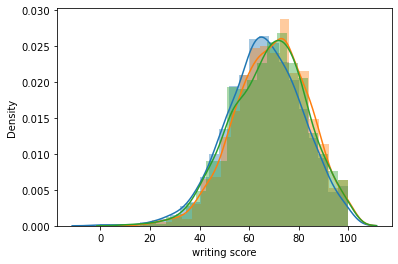

In [80]:
sns.distplot(df['math score']),sns.distplot(df['reading score']),sns.distplot(df['writing score'])

In [57]:
df['average']=(df['math score']+ df['reading score']+ df['writing score'])/3

In [58]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [64]:
#grouping the category by gender
df.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [65]:
df.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [69]:
#number of students having less than 30 marks in maths
df[df['math score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [70]:
numerical_data

['math score', 'reading score', 'writing score']

In [75]:
df_num = df[numerical_data]

In [74]:
from scipy.stats import normaltest

In [78]:
normaltest(df_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

<AxesSubplot:xlabel='math score'>

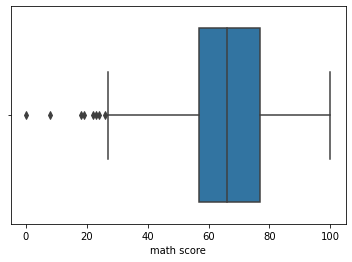

In [82]:
#check outlier
sns.boxplot(df['math score'])

<AxesSubplot:xlabel='reading score'>

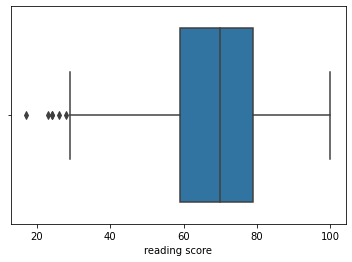

In [83]:
sns.boxplot(df['reading score'])

<AxesSubplot:xlabel='writing score'>

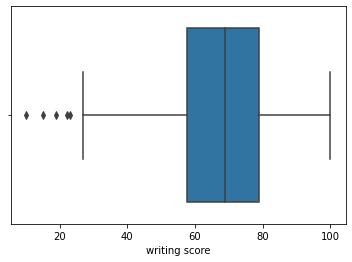

In [84]:
sns.boxplot(df['writing score'])

In [88]:
Q1 = df['math score'].quantile(0.10)

In [89]:
Q1

47.0

In [90]:
Q3 = df['math score'].quantile(0.90)

### 

In [91]:
IQR = Q3-Q1

In [92]:
IQR

39.0

In [93]:
Upper = Q3 + 1.5*IQR

In [94]:
Upper

144.5

In [95]:
Lower = Q1 - 1.5*IQR

In [96]:
Lower

-11.5

In [101]:
df[df['math score']<Lower]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [102]:
Q1 = df['math score'].quantile(0.25)

In [103]:
Q1

57.0

In [104]:
Q3 = df['math score'].quantile(0.75)

### 

In [105]:
IQR = Q3-Q1

In [106]:
IQR

20.0

In [107]:
Upper = Q3 + 1.5*IQR

In [108]:
Upper

107.0

In [109]:
Lower = Q1 - 1.5*IQR

In [110]:
Lower

27.0

In [115]:
df_outliner = df[df['math score']<Lower]

In [116]:
df_outliner

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [119]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [114]:
def outlier_thresholo(df, variable):
    q1=df[variable].quantile(0.25)
    q2=df[variablej.quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
     return lower_limit, up_limit


SyntaxError: invalid syntax (1133167998.py, line 4)

gender                                   female
race/ethnicity                          group B
parental level of education    some high school
lunch                              free/reduced
test preparation course                    none
math score                                   18
reading score                                32
writing score                                28
average                                    26.0
Name: 17, dtype: object

In [121]:
df.drop_values(df_outliner)

AttributeError: 'DataFrame' object has no attribute 'drop_values'

In [122]:
for i in df:
    if df_outliner[i]==df:
        df.drop(i)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='gender', ylabel='count'>

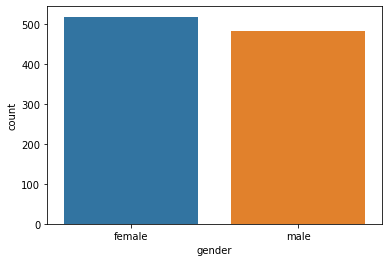

In [135]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

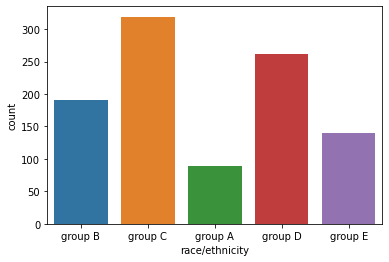

In [136]:
sns.countplot(df['race/ethnicity'])

In [138]:
dfo = df.groupby('gender').mean()

In [139]:
dfo

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [140]:
dfo['average']

gender
female    69.569498
male      65.837483
Name: average, dtype: float64